# Decision Trees - Classification

## 1. Installation

We use Anaconda to install Jupyter Lab

- [Link to Anaconda](https://www.anaconda.com/download/)

- [Link to Jupyter](https://jupyter.org/)

## 2. Training Decision Tree 

### Step 1: Import and Clean Data

In [1]:
# import some packages
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import metrics

In [2]:
# Import the data
df = pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Check the variables
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Assign input variables
X = df.loc[:,['Pclass','Sex','Age','Fare','Embarked','SibSp','Parch']]

# Assign target variable
y = df['Survived']

In [6]:
X.dtypes

Pclass        int64
Sex          object
Age         float64
Fare        float64
Embarked     object
SibSp         int64
Parch         int64
dtype: object

In [7]:
# Change Pclass to categorical variable
X['Pclass'] = X['Pclass'].astype(object)

### Step 2: Check and handle missing values

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Replace missing values by the median
X["Age"] = X["Age"].fillna(X["Age"].median())

# Impute the Embarked variable
X["Embarked"] = X["Embarked"].fillna("S")

In [10]:
X

,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,3,male,22.0,7.2500,S,1,0
1,1,female,38.0,71.2833,C,1,0
2,3,female,26.0,7.9250,S,0,0
3,1,female,35.0,53.1000,S,1,0
4,3,male,35.0,8.0500,S,0,0
...,...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,0,0
887,1,female,19.0,30.0000,S,0,0
888,3,female,28.0,23.4500,S,1,2
889,1,male,26.0,30.0000,C,0,0


In [11]:
pd.get_dummies(X)

,Age,Fare,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,1,0,False,False,True,False,True,False,False,True
1,38.0,71.2833,1,0,True,False,False,True,False,True,False,False
2,26.0,7.9250,0,0,False,False,True,True,False,False,False,True
3,35.0,53.1000,1,0,True,False,False,True,False,False,False,True
4,35.0,8.0500,0,0,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,0,False,True,False,False,True,False,False,True
887,19.0,30.0000,0,0,True,False,False,True,False,False,False,True
888,28.0,23.4500,1,2,False,False,True,True,False,False,False,True
889,26.0,30.0000,0,0,True,False,False,False,True,True,False,False


### Step 3: Encode Categorical Variables

In [12]:
# Encode categorical variable
X = pd.get_dummies(X)

### Step 4: Split the data into training and testing

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15)


### Step 5: Train a model

In [14]:
# Create a decision tree and train
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=7)
tree1.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=7)

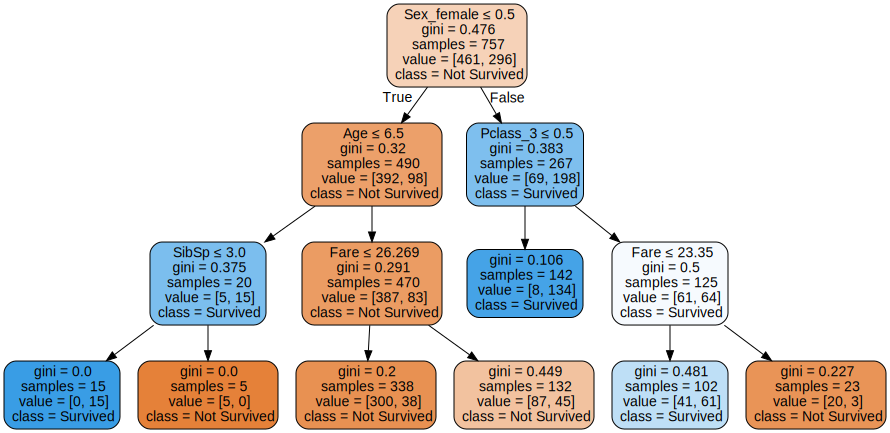

In [15]:
from sklearn import tree

import graphviz 

dot_data = tree.export_graphviz(tree1, out_file=None) 
dot_data = tree.export_graphviz(tree1, out_file=None, 
                     feature_names=x_train.columns,  
                     class_names=['Not Survived','Survived'],  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  

graph


### Step 6: Test the model

In [16]:
ypred_test = tree1.predict(x_test)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ypred_test, y_test)
print('===============')
print('Confusion Matrix:')
print(mat)
print('===============')
print('Testing Accuracy:')
print(mat.diagonal().sum()/mat.sum())
print('===============')

Confusion Matrix:
[[78 11]
 [10 35]]
Testing Accuracy:
0.8432835820895522


In [17]:
import warnings
warnings.filterwarnings("ignore")


# Decide what hyperparameter to tune then decide the searching range
param_grid = {'max_leaf_nodes': range(2,10), 
              'criterion':['gini', 'entropy']}

# Create a list of trees
from sklearn.model_selection import GridSearchCV
tree2 = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree2.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': range(2, 10)})

In [18]:
cv_result = pd.concat([pd.DataFrame(tree2.cv_results_["params"]),pd.DataFrame(tree2.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
cv_result['Rank'] = (-cv_result['Accuracy']).argsort().argsort()
cv_result


,criterion,max_leaf_nodes,Accuracy,Rank
0,gini,2,0.779383,11
1,gini,3,0.772804,14
2,gini,4,0.779409,10
3,gini,5,0.788672,8
4,gini,6,0.795286,5
5,gini,7,0.811110,3
6,gini,8,0.795277,6
7,gini,9,0.796602,4
8,entropy,2,0.779383,12
9,entropy,3,0.772804,15


Best Tree is: {'criterion': 'entropy', 'max_leaf_nodes': 7}



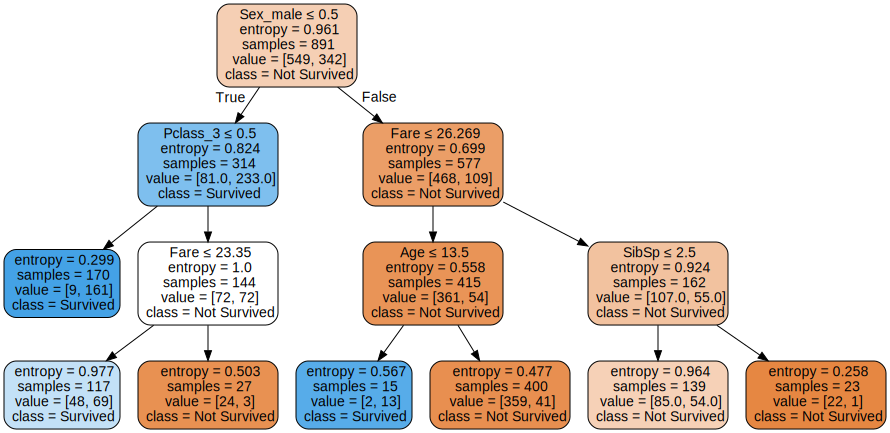

In [19]:
tree3 = DecisionTreeClassifier(**tree2.best_params_)

# Train with the selected hyperparameter
tree3.fit(X, y)

print('Best Tree is:', tree2.best_params_)
print('')
import graphviz 
dot_data = tree.export_graphviz(tree3, out_file=None) 
dot_data = tree.export_graphviz(tree3, out_file=None, 
                     feature_names=x_train.columns,  
                     class_names=['Not Survived','Survived'],  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  

graph

In [20]:
criterion = ['entropy', 'gini']
max_leaf_nodes = range(2, 200)

#erros_plot = function(criterion, )

rs = pd.DataFrame(columns = ['Criterion','Leaves', 'Data','Accuracy'])

for criterion1 in criterion:
    for max_leaf_nodes1 in max_leaf_nodes:
        tree1 = DecisionTreeClassifier(criterion=criterion1, max_leaf_nodes=max_leaf_nodes1)
        tree1.fit(x_train, y_train)
        new_row={'Criterion':criterion1,'Leaves':max_leaf_nodes1, 'Data':'Train','Accuracy':tree1.score(x_train, y_train)}
        
        rs = pd.concat([rs, pd.DataFrame([new_row])], ignore_index=True)


        new_row={'Criterion':criterion1,'Leaves':max_leaf_nodes1, 'Data':'Test','Accuracy':tree1.score(x_test, y_test)}
        rs = pd.concat([rs, pd.DataFrame([new_row])], ignore_index=True)

<Axes: xlabel='Leaves', ylabel='Accuracy'>

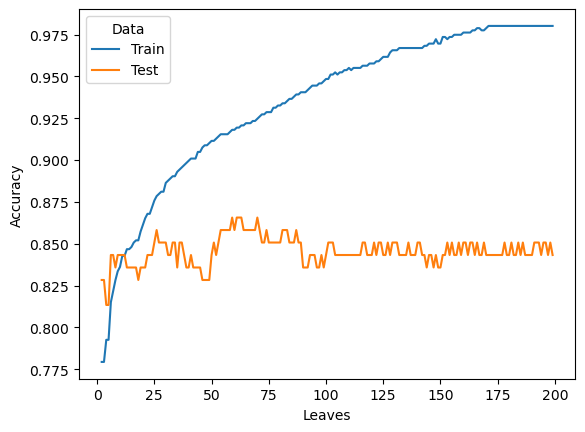

In [21]:
# Plot the training and testing accuracy of the model when criterion = gini
import seaborn as sns
rs_gini = rs[rs['Criterion']=='gini']
sns.lineplot(data=rs_gini, y="Accuracy", x="Leaves", hue='Data', ci=None)
